In [2]:
import scipy.io

data = scipy.io.loadmat("maze.mat")

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'map'])


In [3]:
maze = data["map"]  # Replace "map" with the actual variable name
for row in maze:
    print(" ".join(str(cell) for cell in row))

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [4]:
import numpy as np
positions = np.where(maze == 2)  # Returns row and column indices

if positions[0].size > 0:
    print("Endpoint found at:", list(zip(positions[0], positions[1])))
else:
    print("No endpoint (2) found in the maze.")


Endpoint found at: [(4, 149)]


In [5]:
import numpy as np
from collections import deque

def wavefront_planner(map_array, start_row, start_column):
    if map_array[start_row, start_column] == 1:
        print("Invalid start position: Out of bounds.")
        return None, None

    if map_array[start_row, start_column] == 1:
      print("Invalid start position: Inside an obstacle.")
      return None, None
    
    rows, cols = map_array.shape
    value_map = np.full((rows, cols), -1)  # Initialize with -1
    goal_position = np.argwhere(map_array == 2)
    
    
    goal_x, goal_y = goal_position[0]
    value_map[map_array == 1] = 1  # Keep obstacles as 1
    value_map[goal_x, goal_y] = 2  # Goal starts at 2
    
    queue = deque([(goal_x, goal_y)])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]  # 8-connectivity
    
    while queue:
        x, y = queue.popleft()
        current_value = value_map[x, y]
        
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and value_map[nx, ny] == -1:
                value_map[nx, ny] = current_value + 1
                queue.append((nx, ny))
    
    # Pathfinding (backtracking from start position to goal)
    trajectory = []
    x, y = start_row, start_column
    while (x, y) != (goal_x, goal_y):
        trajectory.append((x, y))
        min_val = float('inf')
        next_pos = None
        
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and value_map[nx, ny] > 1:
                if value_map[nx, ny] < min_val:
                    min_val = value_map[nx, ny]
                    next_pos = (nx, ny)
        
        if next_pos is None:
            raise ValueError("No valid path to the goal!")
        x, y = next_pos
    
    trajectory.append((goal_x, goal_y))
    return value_map, trajectory



In [6]:
start_x = int(input('Enter the starting row: '))
start_y = int(input('Enter the starting column: '))

value_map, trajectory = wavefront_planner(maze, start_x, start_y)

Enter the starting row:  3
Enter the starting column:  3


In [16]:
for row in value_map:
    print(" ".join(str(cell) for cell in row))

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 2204 2203 2202 2201 2200 219

In [7]:
print("Trajectory:")
print(trajectory)

Trajectory:
[(3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (3, 28), (3, 29), (3, 30), (3, 31), (3, 32), (3, 33), (3, 34), (3, 35), (3, 36), (3, 37), (3, 38), (3, 39), (3, 40), (3, 41), (3, 42), (3, 43), (3, 44), (3, 45), (3, 46), (3, 47), (3, 48), (3, 49), (3, 50), (3, 51), (3, 52), (3, 53), (4, 54), (5, 55), (6, 56), (7, 57), (8, 58), (9, 58), (10, 57), (10, 56), (10, 55), (10, 54), (10, 53), (10, 52), (10, 51), (10, 50), (10, 49), (10, 48), (10, 47), (10, 46), (10, 45), (11, 44), (12, 43), (13, 42), (14, 41), (15, 40), (16, 39), (17, 39), (18, 40), (18, 41), (18, 42), (18, 43), (18, 44), (18, 45), (18, 46), (18, 47), (18, 48), (18, 49), (18, 50), (18, 51), (18, 52), (19, 53), (20, 54), (21, 55), (22, 56), (23, 57), (24, 58), (25, 58), (26, 57), (26, 56), (26, 55), (26, 54), (26, 53), (26, 52), (26, 51), (26, 50), (

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def visualize_wavefront(maze, value_map, trajectory, start):
    # Define a colormap with distinct colors
    cmap = mcolors.ListedColormap(["white", "blue", "green", "black", "red"])  
    bounds = [0, 0.5, 1.5, 2.5, 3.5, 4.5]  
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    
    # Initialize a visual map
    visual_map = np.full(maze.shape, 0)  # Default to free space (0 -> white)
    visual_map[maze == 1] = 1  # Obstacles (1 -> blue)
    visual_map[maze == 2] = 2  # Goal (2 -> green)
    visual_map[start] = 3  # Start position (yellow)

    # Mark the trajectory in red, but keep the start position yellow
    for pos in trajectory:
        if pos != start and maze[pos] != 2:  # Ensure start stays yellow & goal stays green
            visual_map[pos] = 4  # Path (red)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(visual_map, cmap=cmap, norm=norm)
    plt.axis("off")
    plt.title("Wavefront Path Planning Visualization")
    plt.show()


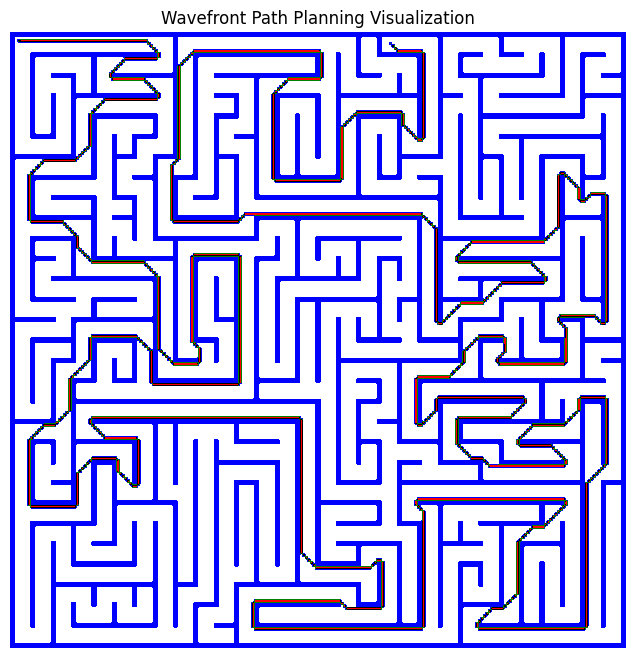

In [9]:
# Example usage:
start = (start_x, start_y)
value_map, trajectory = wavefront_planner(maze, *start)
visualize_wavefront(maze, value_map, trajectory, start)